CSC2515 HW2 Q2

Author: Zitong Li (UTorid:liziton1)

Collaborator: Zhanwen Tan(UTorid:tanzhanw), Yuyi Ding(UTorid:dingyuyi)

In [3]:
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [20]:
def visualize_bias_var():
    plt.figure()
    sigma, n = 9, 10
    x_axis = [_ for _ in range(0, 11)]
    y1, y2, y3 = [], [], []
    
    for l in range(0, 11):
        bias, variance = (l/(1+l))**2, sigma/(n*((1+l)**2))
        estimator = bias + variance
        y1.append(bias)
        y2.append(variance)
        y3.append(estimator)
    
    plt.plot(x_axis, y1, label = "bias")
    plt.plot(x_axis, y2, label = "variance")
    plt.plot(x_axis, y3, label = "expected squared error")
    plt.xlabel("lambda")
    plt.legend()
    plt.show()

In [5]:
def load_data():
    boston = datasets.load_boston()
    X = boston.data
    y = boston.target
    features = boston.feature_names
    return X, y, features

In [6]:
def visualize(X, y, features):
    plt.figure(figsize=(20, 5))
    feature_count = X.shape[1]

    # i: index
    for i in range(feature_count):
        plt.subplot(3, 5, i + 1)
        #TODO: Plot feature i against y
        plt.plot(X[:, i], y, 's', markersize = 1)
        plt.xlabel(features[i])
        plt.ylabel("Boston Housing Price")
    
    plt.tight_layout()
    plt.show()

In [24]:
def fit_regression(X, Y):
    #TODO: implement linear regression
    # Remember to use np.linalg.solve instead of inverting!
    
    #add a column of 1s to the design matrix
    X = np.concatenate((np.ones((X.shape[0],1)),X),axis=1)
    
    X_transpose = X.transpose() # (D+1)*N
    A = np.matmul(X_transpose, X)#(D+1)*(D+1)
    x_tran_target = np.matmul(X_transpose, Y)
    
    w = np.linalg.solve(A, x_tran_target)
    return w

In [8]:
def tabulate(w, features):
    
    fig, ax = plt.subplots()
    ax.set_axis_off()
    cells = np.c_[w, features]
    t = ax.table(cellText = cells, colLabels = ["weight", "feature"])
    plt.show()

In [9]:
def get_prediction(X_test, w):
    #add a column of 1s to the design matrix
    padding = np.ones(X_test.shape[0]) #N*1
    X = np.c_[padding, X_test] #N*(D+1)
    return np.matmul(X, w)

In [10]:
def calculate_error(Y_predict, Y_test):
    N = Y_predict.shape[0]
    #MSE:
    error = Y_predict - Y_test
    mse = np.dot(error, error) / N
    
    #mae
    mae = mean_absolute_error(Y_test, Y_predict)
    #r2
    r2 = r2_score(Y_test,Y_predict)
    return mse, mae, r2

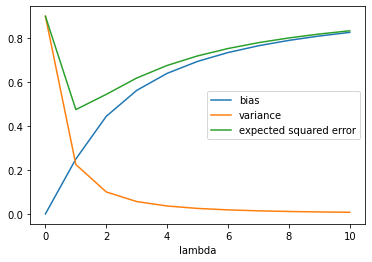

Features: ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
(506, 13) (506,) (13,)


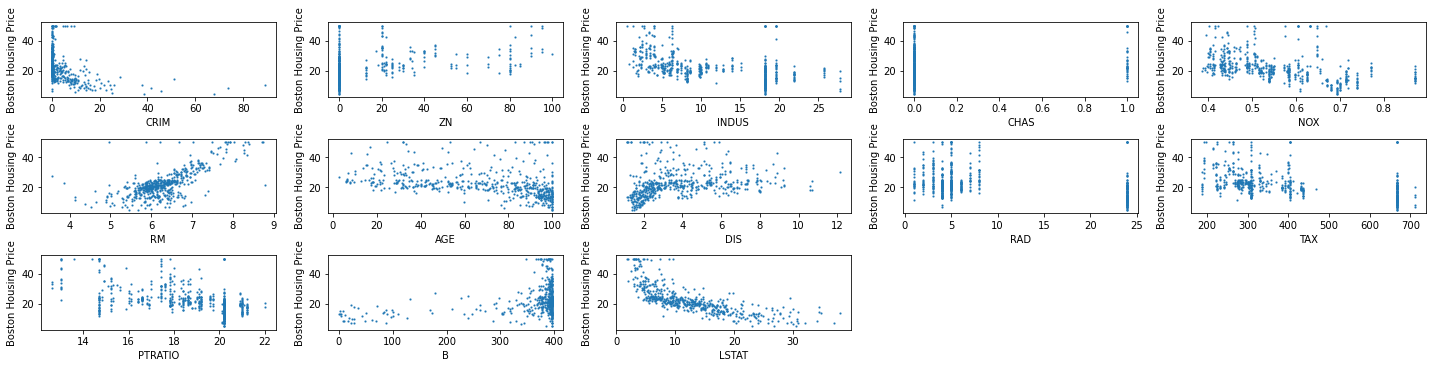

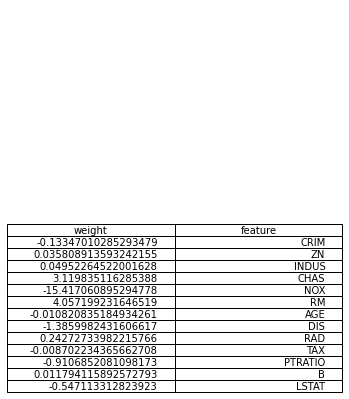

The MSE of the model is: 21.517444231178086,
The MAE for the model is: 3.162709871457378,
The R^2 regression score of the model is: 0.7112260057484815


In [25]:
def main():
    
    #q1, visualize estimated squared error and its bias and variance
    visualize_bias_var()
    
    #q2
    # Load the data
    X, y, features = load_data()
    print("Features: {}".format(features))
    
    print(X.shape, y.shape, features.shape)
    # Visualize the features
    visualize(X, y, features)

    #TODO: Split data into train and test
    X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    # Fit regression model
    w = fit_regression(X_train, Y_train)
    
    tabulate(w[1:], features)
    # Compute fitted values, MSE, etc.
    Y_predict = get_prediction(X_test, w)
    mse, mae, r2 = calculate_error(Y_predict, Y_test)
    print("The MSE of the model is: {},\nThe MAE for the model is: {},\nThe R^2 regression score of the model is: {}".format(mse, mae, r2));
    
if __name__ == "__main__":
    main()